# Model training

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report
from sklearn.metrics import confusion_matrix, classification_report


In [52]:
df = pd.read_csv("../data/prediction.csv", index_col=0, parse_dates=True)

In [53]:
df.dropna(inplace=True)

In [54]:
df.head()

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,fi_1000,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,random,target
2018-01-20 19:46:59.346,50.370105,-0.000624,50.466023,0.000050,50.041302,-0.000001,13.1,63.8,76.9,0.1226,...,-2.999015,-0.005697,1.770447,0.000297,-0.984117,-0.000034,0.087077,-0.161973,0.678434,0
2018-01-21 00:18:39.800,49.608940,-0.001772,50.394686,0.000054,50.037201,-0.000001,52.7,-30.8,21.9,-0.1188,...,-2.799998,-0.005833,1.527080,0.000358,-1.177704,-0.000035,0.084229,-0.161722,0.117265,0
2018-01-21 00:38:50.704,48.551857,-0.002823,50.287443,0.000038,50.028689,-0.000001,100.0,-90.7,9.3,-0.1728,...,-3.636444,-0.006412,0.546407,0.000231,-3.568526,-0.000059,0.083329,-0.188734,0.297218,0
2018-01-21 00:59:11.064,47.935846,-0.003798,50.214713,0.000030,50.022940,-0.000002,100.0,-99.6,0.4,-0.1861,...,-3.799871,-0.006838,1.320300,0.000303,1.786688,-0.000006,0.082001,-0.172250,0.542342,1
2018-01-21 02:34:24.052,48.862636,-0.001851,50.255369,0.000024,50.026978,-0.000002,65.1,-52.0,13.1,-0.1084,...,-2.892617,-0.001495,0.220404,0.000064,6.063689,0.000037,0.079259,-0.185536,0.327819,1


In [55]:
X = df.drop(["target"], axis=1)
X.head(3)

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,bb_wband_rate_100000,fi_1000,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,random
2018-01-20 19:46:59.346,50.370105,-0.000624,50.466023,0.000050,50.041302,-0.000001,13.1,63.8,76.9,0.1226,...,-0.000813,-2.999015,-0.005697,1.770447,0.000297,-0.984117,-0.000034,0.087077,-0.161973,0.678434
2018-01-21 00:18:39.800,49.608940,-0.001772,50.394686,0.000054,50.037201,-0.000001,52.7,-30.8,21.9,-0.1188,...,-0.000794,-2.799998,-0.005833,1.527080,0.000358,-1.177704,-0.000035,0.084229,-0.161722,0.117265
2018-01-21 00:38:50.704,48.551857,-0.002823,50.287443,0.000038,50.028689,-0.000001,100.0,-90.7,9.3,-0.1728,...,-0.000790,-3.636444,-0.006412,0.546407,0.000231,-3.568526,-0.000059,0.083329,-0.188734,0.297218


In [56]:
y = df.target
y

2018-01-20 19:46:59.346    0
2018-01-21 00:18:39.800    0
2018-01-21 00:38:50.704    0
2018-01-21 00:59:11.064    1
2018-01-21 02:34:24.052    1
                          ..
2021-06-18 18:11:40.194    0
2021-06-18 18:38:22.935    1
2021-06-19 02:35:14.518    0
2021-06-19 03:29:01.660    1
2021-06-19 12:48:14.298    0
Name: target, Length: 5516, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    shuffle=False)

In [58]:
n_estimators = 10000
model = RandomForestClassifier(max_depth=2, n_estimators=n_estimators,
                            criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10000)

Text(-1.5, 0.5, 'Predicted label')

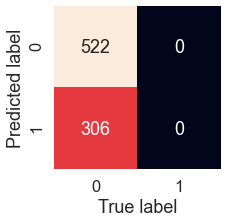

In [59]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False,
                 fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")

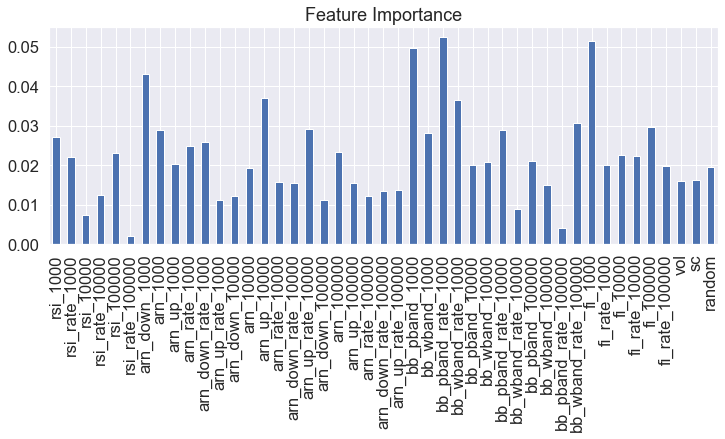

In [60]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(12, 4));

In [61]:
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       522
           1       0.00      0.00      0.00       306

    accuracy                           0.63       828
   macro avg       0.32      0.50      0.39       828
weighted avg       0.40      0.63      0.49       828



/Volumes/Storage/Programming/bitcoin-printer/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/Storage/Programming/bitcoin-printer/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/Storage/Programming/bitcoin-printer/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

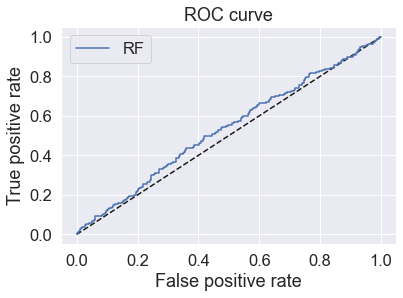

In [62]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Plotting

In [63]:
prices = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [64]:
df.target

2018-01-20 19:46:59.346    0
2018-01-21 00:18:39.800    0
2018-01-21 00:38:50.704    0
2018-01-21 00:59:11.064    1
2018-01-21 02:34:24.052    1
                          ..
2021-06-18 18:11:40.194    0
2021-06-18 18:38:22.935    1
2021-06-19 02:35:14.518    0
2021-06-19 03:29:01.660    1
2021-06-19 12:48:14.298    0
Name: target, Length: 5516, dtype: int64

In [65]:
plot = df[-len(y_pred):].copy()
plot["close"] = prices.reindex(plot.index).close
plot["up"] = list(map(lambda x, c: c if x==1 else None, y_pred, plot.close))
plot["down"] = list(map(lambda x, c: c if x==0 else None, y_pred, plot.close))


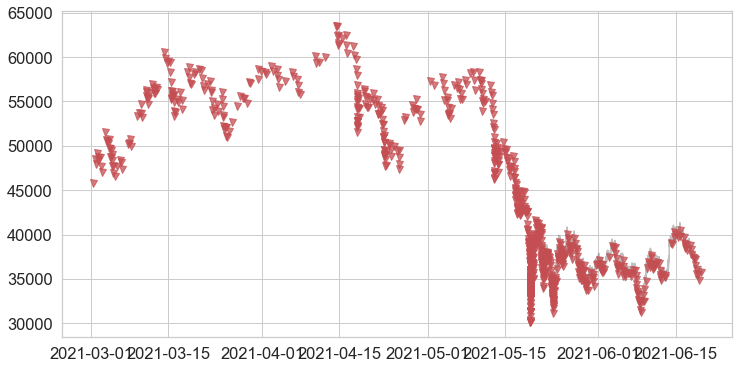

In [66]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(prices.close[-500000:], alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g', linewidth=0)

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r', linewidth=0)